Author : Pramil Paudel 
In Partial fullfillment of "Introduction to data science"

Import required packages

In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions

print("Packages loaded successfully")
      

Packages loaded successfully


# Data Preprocessing 
# Read data and looking at the data structure 
# Group By 'Play' and "Player" so we can find how many different players are there for a play as well as their repetition. 
# Is a count displayed is true ? There may be the cases of NaN too. Our idea is to find Player, if it is NaN, does it signify the data ? So removing the lines where any of the columns is NaN. 

Player distribution is :>>>>>>
count         105152
unique           934
top       GLOUCESTER
freq            1811
Name: Player, dtype: object
Player distribution against Play is :>>>>>>
    Dataline      Play  PlayerLinenumber ActSceneLine         Player  \
3          4  Henry IV               1.0        1.1.1  KING HENRY IV   
4          5  Henry IV               1.0        1.1.2  KING HENRY IV   
5          6  Henry IV               1.0        1.1.3  KING HENRY IV   
6          7  Henry IV               1.0        1.1.4  KING HENRY IV   
7          8  Henry IV               1.0        1.1.5  KING HENRY IV   
8          9  Henry IV               1.0        1.1.6  KING HENRY IV   
9         10  Henry IV               1.0        1.1.7  KING HENRY IV   
10        11  Henry IV               1.0        1.1.8  KING HENRY IV   
11        12  Henry IV               1.0        1.1.9  KING HENRY IV   
12        13  Henry IV               1.0       1.1.10  KING HENRY IV   

                    

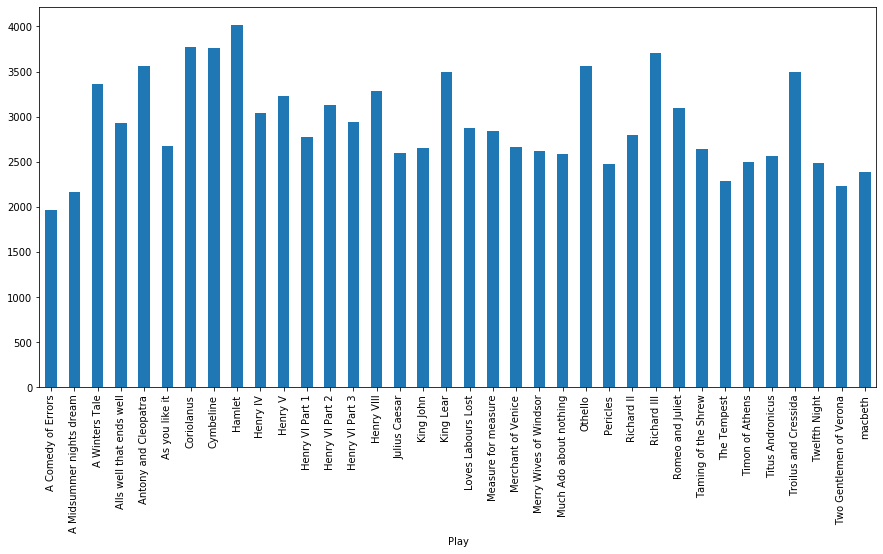

In [2]:
## defining source and printing 10 lines using pandas dataframe 
## describing the data frame 
PROJECT_ROOT_DORECTORY = '~/Documents/FALL_2020/INTRO_DATASCIENCE/WEEKLY_PROJECT/week_two'
shakespeare_drama_df = pd.read_csv(PROJECT_ROOT_DORECTORY + "/data/Shakespeare_data.csv")


## ------ Feature Engineering ----------------
## Removing the rows where any column is NaN
shakespeare_drama_df = shakespeare_drama_df.dropna( axis=0)

##Finding the information of Player occurance  
print("Player distribution is :>>>>>>")
print(shakespeare_drama_df['Player'].describe())

## Getting more details of the data, grouping by play and plot against Player 
print("Player distribution against Play is :>>>>>>")
shakespeare_drama_grouped_play = shakespeare_drama_df.groupby("Play").count()
fig, ax = plt.subplots(figsize=(15,7))
shakespeare_drama_grouped_play['Player'].plot.bar()
print(shakespeare_drama_df.head(10))


## Defining a subroute for plotting a heatmap 

In [3]:
def plot_correlation(data):
    '''
    plot correlation's matrix to explore dependency between features 
    '''
    # init figure size
    rcParams['figure.figsize'] = 18, 18
    fig = plt.figure()
    sns.heatmap(data.corr(), annot=True, fmt=".2f")
    plt.show()
    fig.savefig('corr.png')

# Now lets make train and test dataset 
# Lets divide around 70% as train set and test it against the test dataset 

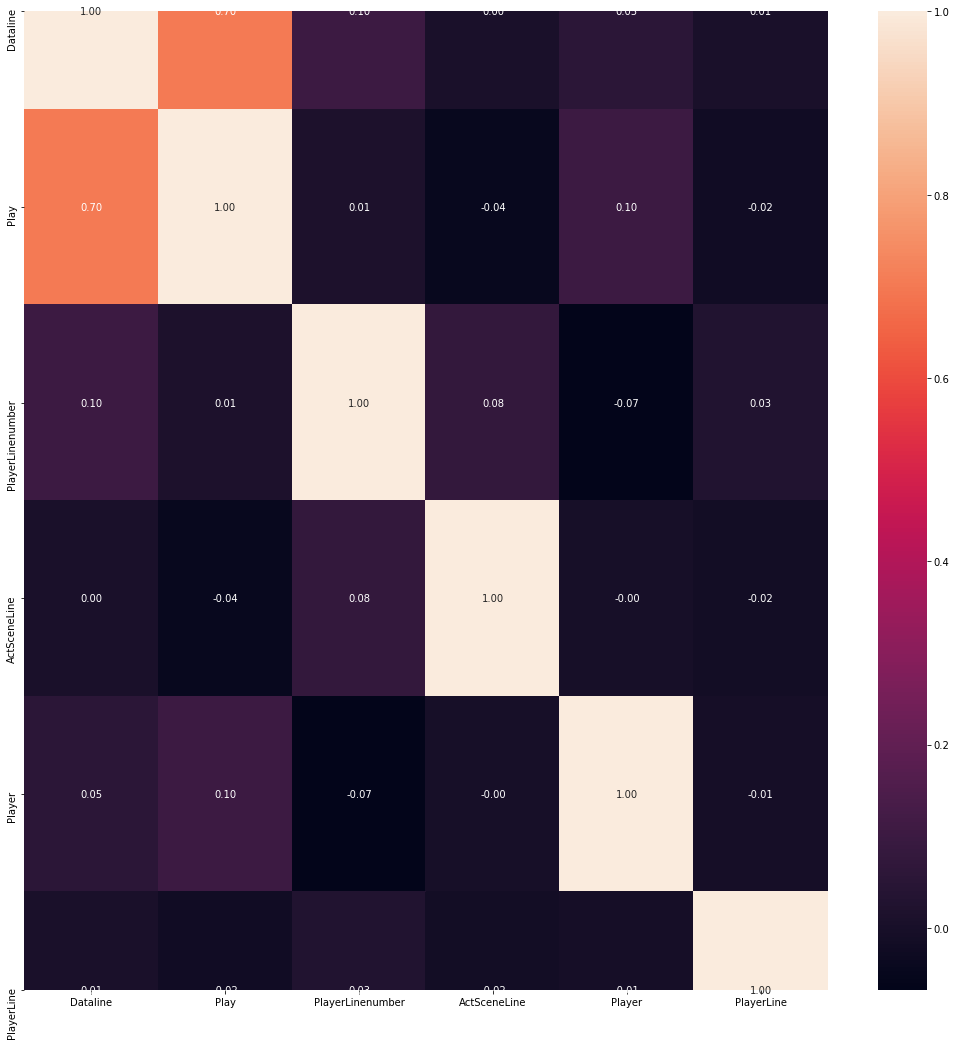

,Dataline,Play,PlayerLinenumber,ActSceneLine
31391,29545,7,4,10991
71569,67554,22,65,13004
15331,14423,3,11,13887
96516,91068,31,4,746
51329,48470,17,2,8827
32008,30129,7,41,15189
2391,2290,9,6,9885
12179,11452,13,29,13442
1777,1703,9,51,6067
22994,21602,0,53,3705


In [4]:
# Lets plot a heatmap 
le = preprocessing.LabelEncoder()
shakespeare_drama_df = shakespeare_drama_df.apply(le.fit_transform)
plot_correlation(shakespeare_drama_df)

#Separating target column at first 
feature_columns =['Dataline','Play','PlayerLinenumber', 'ActSceneLine']
target_column=['Player']

# Retaining required columns in each DF 
x_drama_df = shakespeare_drama_df[feature_columns]
y_drama_df = shakespeare_drama_df[target_column]

## Separating data in test and train set using sklearn train_test_separation method 
x_train,x_test,y_train,y_test=train_test_split(x_drama_df,y_drama_df,train_size=0.7,test_size=0.3,random_state=123)

x_train.head(10)

## Classifier -01 
## Lets apply k-nearest neighbour Classifier 
## To apply K -nearest neighbour Classifier,  KNeighborsClassifier package from sklearn is used 
## We define classifier using the train set and later use it to fit test data 
## We have to pass the neighbors count too (Lets check with random number and find out best ) 

In [5]:
k_classifier = KNeighborsClassifier(n_neighbors=4)
print(y_train.head())
# Fitting the data
k_classifier.fit(x_train,y_train)
G = k_classifier.kneighbors_graph(x_train)
G.toarray()

# Predicting and calculating the score 
k_classifier.predict(x_test)

#Calculating the score of prediction 
k_classifier.score(x_test,y_test,sample_weight=None)



       Player
31391      82
71569     156
15331     482
96516      76
51329     363


/Users/patthar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.686584670005706

## Lets try Naive Bayes Classifier using sklearn

In [9]:
## Classifier creation
gnb_classifier = GaussianNB()
#Fitting train data
gnb_classifier.fit(x_train,y_train)
# Predicting the test data 
y_pred = gnb_classifier.predict(x_test)
gnb_classifier.score(x_test,y_test,sample_weight=None)


/Users/patthar/opt/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.23156660115387054

## Lets use another Classifier Support Vector Machine 

In [ ]:
# Creating the classifier
svm_classifier = svm.SVC()

#Fitting train set 
svm_classifier.fit(x_train,y_train)

#Predicting the data
y_pred = svm_classifier.predict(x_test)


/Users/patthar/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
